In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import fetch_openml
from umap import UMAP

–ö–∞–∂–¥—ã–π –ø—É–Ω–∫—Ç, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –≤—ã–ø–æ–ª–Ω–∏—Ç—å –≤ —Ä–∞–º–∫–∞—Ö –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è, –∏–º–µ–µ—Ç –æ–±—ä—è–≤–ª–µ–Ω–Ω—É—é "—Ü–µ–Ω—É" –≤ –±–∞–ª–ª–∞—Ö. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–∞—è —Å—É–º–º–∞ ‚Äì 10 –±–∞–ª–ª–æ–≤, –∞ —Å —É—á—ë—Ç–æ–º –±–æ–Ω—É—Å–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤ ‚Äì 12 –±–∞–ª–ª–æ–≤. –í—ã–ø–æ–ª–Ω—è—Ç—å –≤—Å–µ –ø—É–Ω–∫—Ç—ã –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Ç–æ–ª—å–∫–æ —á–∞—Å—Ç—å. –í –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ –ø—É–Ω–∫—Ç–æ–≤ –æ–∂–∏–¥–∞–µ—Ç—Å—è, —á—Ç–æ –≤—ã –Ω–∞–ø–∏—à–µ—Ç–µ —Ä–∞–±–æ—Ç–∞—é—â–∏–π –∫–æ–¥ –Ω–∞ Python; –∏–Ω–æ–≥–¥–∞ –Ω–∞–¥–æ –±—É–¥–µ—Ç –ø–∏—Å–∞—Ç—å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –≤ —Å–≤–æ–±–æ–¥–Ω–æ–π —Ñ–æ—Ä–º–µ ‚Äì –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–¥—Ö–æ–¥–æ–≤ –∫ —Ä–µ—à–µ–Ω–∏—é –æ–¥–Ω–æ–π –∑–∞–¥–∞—á–∏. –¢–∞–º, –≥–¥–µ –æ—Å—Ç–∞–≤–ª–µ–Ω—ã –ø—É—Å—Ç—ã–µ –∫–ª–µ—Ç–∫–∏ –ø–æ–¥ –≤–∞—à–∏ –æ—Ç–≤–µ—Ç—ã, –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ —Å–≤–æ–µ–º—É —É—Å–º–æ—Ç—Ä–µ–Ω–∏—é –¥–æ–±–∞–≤–ª—è—Ç—å –µ—â—ë –∫–ª–µ—Ç–∫–∏.

* * *

–≠—Ç–∞ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ –ø–æ—Å–≤—è—â–µ–Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –ú—ã –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ä—É–∫–æ–ø–∏—Å–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ —Ü–∏—Ñ—Ä, –Ω–∞—É—á–∏–º—Å—è –∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞—Ç—å –¥–≤—É–º—è —Ä–∞–∑–Ω—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ (–∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –∞–ª–≥–æ—Ä–∏—Ç–º $K$-means), –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è –∏ –≤—ã–±–∏—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –∞ —Ç–∞–∫–∂–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

# 1. –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–∞–Ω–Ω—ã–µ, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –º—ã –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å, –¥–æ—Å—Ç—É–ø–Ω—ã –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ scikit-learn (–º–æ–¥—É–ª—å –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è `sklearn`) –≤ –ø–æ–¥–º–æ–¥—É–ª–µ `datasets` —á–µ—Ä–µ–∑ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è `load_digits`. –í—Å–µ–≥–æ –∏–º–µ–µ—Ç—Å—è 1797 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –∫–∞–∂–¥–æ–µ –∏–∑ –Ω–∏—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —á—ë—Ä–Ω–æ-–±–µ–ª—É—é –∫–∞—Ä—Ç–∏–Ω–∫—É 8 $\times$ 8 –ø–∏–∫—Å–µ–ª–µ–π. –≠—Ç–∏ –∫–∞—Ä—Ç–∏–Ω–∫–∏ ‚Äì —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–µ —Ä—É–∫–æ–ø–∏—Å–Ω—ã–µ —Ü–∏—Ñ—Ä—ã –æ—Ç 0 –¥–æ 9. –û–±—Ä–∞–∑—Ü–æ–≤ –Ω–∞–ø–∏—Å–∞–Ω–∏—è –∫–∞–∂–¥–æ–π —Ü–∏—Ñ—Ä—ã –¥–∞–Ω–æ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Ä–æ–≤–Ω—É, –æ–∫–æ–ª–æ 180.

–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∫–∞–∂–¥–∞—è –∫–∞—Ä—Ç–∏–Ω–∫–∞ "—Ä–∞–∑–≤—ë—Ä–Ω—É—Ç–∞" –≤ —Å—Ç—Ä–æ–∫—É, —Ç–∞–∫ —á—Ç–æ NumPy-–º–∞—Å—Å–∏–≤, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ö—Ä–∞–Ω—è—Ç—Å—è –¥–∞–Ω–Ω—ã–µ, –∏–º–µ–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å 2 –∏ –≤–µ–ª–∏—á–∏–Ω—É 1797 $\times$ 64 (–∞ –Ω–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å 3 –∏ –≤–µ–ª–∏—á–∏–Ω—É 1797 $\times$ 8 $\times$ 8). –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ –≤ –∫–∞–∂–¥–æ–º –ø–∏–∫—Å–µ–ª–µ –∫–æ–¥–∏—Ä—É–µ—Ç—Å—è —Ü–µ–ª—ã–º —á–∏—Å–ª–æ–º –æ—Ç 0 –¥–æ 16.

–ö—Ä–æ–º–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π (–∫–∞—Ä—Ç–∏–Ω–æ–∫), –∏–∑–≤–µ—Å—Ç–Ω—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∏–º –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π: –∫–∞–∫—É—é —Ü–∏—Ñ—Ä—É –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –∏–∑–æ–±—Ä–∞–∂–∞–µ—Ç –∫–∞–∂–¥–∞—è –∫–∞—Ä—Ç–∏–Ω–∫–∞. –ú—ã –º–æ–≥–ª–∏ –±—ã —Å—Ä–∞–∑—É —Å—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞—Ç—å –∑–∞–¥–∞—á—É –æ–±—É—á–µ–Ω–∏—è —Å —É—á–∏—Ç–µ–ª–µ–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Ü–∏—Ñ—Ä—ã –ø–æ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º, –Ω–æ –¥–ª—è —Ü–µ–ª–µ–π —ç—Ç–æ–π –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç—ã –º—ã –±—É–¥–µ–º –¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å –ø–æ-–¥—Ä—É–≥–æ–º—É: —Å–¥–µ–ª–∞–µ–º –≤–∏–¥, —á—Ç–æ –Ω–∞–º –Ω–µ –∏–∑–≤–µ—Å—Ç–Ω—ã –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ (—Ç. –µ. —Ü–∏—Ñ—Ä—ã) –∏ –¥–∞–∂–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤, –∏ –ø–æ–ø—Ä–æ–±—É–µ–º —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∞–∏–ª—É—á—à–∏–º, –∞ –∑–∞—Ç–µ–º –ø–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–æ—á–Ω–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç —Å –≥—Ä—É–ø–ø–∞–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö —Ü–∏—Ñ—Ä.

**(0.5 –±–∞–ª–ª–∞)** –ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ. –î–æ–±–µ–π—Ç–µ—Å—å, —á—Ç–æ–±—ã –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `X` –æ–∫–∞–∑–∞–ª—Å—è –º–∞—Å—Å–∏–≤ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π 1797 $\times$ 64 —á–∏—Å–ª–∞, –∞ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `y` ‚Äì –º–∞—Å—Å–∏–≤ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π 1797 —á–∏—Å–µ–ª.

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –ö–∞–∫ –∑–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞–Ω–Ω—ã–µ, –æ–±—ä—è—Å–Ω–µ–Ω–æ –≤ —Å–ø—Ä–∞–≤–∫–µ –∫ —Ñ—É–Ω–∫—Ü–∏–∏ `load_digits`.
- –†–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞ —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –∞—Ç—Ä–∏–±—É—Ç–µ `shape`.

In [3]:
X, y = load_digits(return_X_y=True)

**(1 –±–∞–ª–ª)** –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –ø–µ—Ä–≤—ã–µ –¥–µ—Å—è—Ç—å –∫–∞—Ä—Ç–∏–Ω–æ–∫, —Ä–∞—Å–ø–æ–ª–æ–∂–∏–≤ –∏—Ö –Ω–∞ —Å–µ—Ç–∫–µ 3 $\times$ 4 (–≤ –ø–æ—Å–ª–µ–¥–Ω–µ–º —Ä—è–¥—É –æ—Å—Ç–∞–Ω—É—Ç—Å—è –ø—É—Å—Ç—ã–µ –º–µ—Å—Ç–∞). –î–æ–±–µ–π—Ç–µ—Å—å, —á—Ç–æ–±—ã —Ñ–æ–Ω –∫–∞—Ä—Ç–∏–Ω–æ–∫ –±—ã–ª –±–µ–ª—ã–º, –∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ü–∏—Ñ—Ä ‚Äì —Ç—ë–º–Ω—ã–º–∏.

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –ù–µ –∑–∞–±—É–¥—å—Ç–µ –∏–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å NumPy –∏ Matplotlib.
- –ö–∞—Ä—Ç–∏–Ω–∫–∏ 8 $\times$ 8 –º–æ–∂–Ω–æ –ª–∏–±–æ –¥–æ—Å—Ç–∞—Ç—å –≥–æ—Ç–æ–≤—ã–º–∏ –∏–∑ –æ–±—ä–µ–∫—Ç–∞, –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ–≥–æ —Ñ—É–Ω–∫—Ü–∏–µ–π `load_digits`, –ª–∏–±–æ —Å–¥–µ–ª–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –∏–∑ —Å—Ç—Ä–æ–∫ –º–∞—Å—Å–∏–≤–∞ `X`. –í–æ –≤—Ç–æ—Ä–æ–º —Å–ª—É—á–∞–µ –ø–æ–ª—å–∑—É–π—Ç–µ—Å—å –º–µ—Ç–æ–¥–æ–º `reshape`.
- –ß—Ç–æ–±—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–µ –±—ã–ª–æ —Ü–≤–µ—Ç–Ω—ã–º, –º–æ–∂–Ω–æ –≤—ã–∑–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é `plt.gray`, –ø—Ä–µ–∂–¥–µ —á–µ–º –Ω–∞—á–∞—Ç—å —Ä–∏—Å–æ–≤–∞—Ç—å.
- –†–∞—Å–ø–æ–ª–∞–≥–∞—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–∞ —Å–µ—Ç–∫–µ —É–º–µ–µ—Ç —Ñ—É–Ω–∫—Ü–∏—è `plt.subplot`. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å–æ —Å–ø—Ä–∞–≤–∫–æ–π –∫ –Ω–µ–π.
- –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é —á–∏—Å–ª–æ 0 –∫–æ–¥–∏—Ä—É–µ—Ç —á—ë—Ä–Ω—ã–π —Ü–≤–µ—Ç, –∞ —á–∏—Å–ª–æ 16 ‚Äì –±–µ–ª—ã–π —Ü–≤–µ—Ç. –ü–æ–¥—É–º–∞–π—Ç–µ, –∫–∞–∫ –æ–±—Ä–∞—Ç–∏—Ç—å —Ü–≤–µ—Ç–∞ –æ–¥–Ω–æ–π –æ–ø–µ—Ä–∞—Ü–∏–µ–π –Ω–∞–¥ NumPy-–º–∞—Å—Å–∏–≤–æ–º.
- –í—ã–≤–æ–¥–∏—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫—É –Ω–∞ —ç–∫—Ä–∞–Ω —É–º–µ–µ—Ç —Ñ—É–Ω–∫—Ü–∏—è `plt.imshow`. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å–æ —Å–ø—Ä–∞–≤–∫–æ–π –∫ –Ω–µ–π.
- –ï—Å–ª–∏ —Å—á–∏—Ç–∞–µ—Ç–µ –Ω—É–∂–Ω—ã–º, –º–æ–∂–µ—Ç–µ –æ—Ç–∫–ª—é—á–∏—Ç—å —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ ‚Äì –ø–∞—Ä–∞–º–µ—Ç—Ä `interpolation` —É —Ñ—É–Ω–∫—Ü–∏–∏ `plt.imshow`.
- –ï—Å–ª–∏ —Å—á–∏—Ç–∞–µ—Ç–µ –Ω—É–∂–Ω—ã–º, –º–æ–∂–µ—Ç–µ –æ—Ç–∫–ª—é—á–∏—Ç—å –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–Ω—ã—Ö –æ—Å—è—Ö. –ó–∞ —ç—Ç–æ –æ—Ç–≤–µ—á–∞—é—Ç —Ñ—É–Ω–∫—Ü–∏–∏ `plt.xticks` –∏ `plt.yticks`.

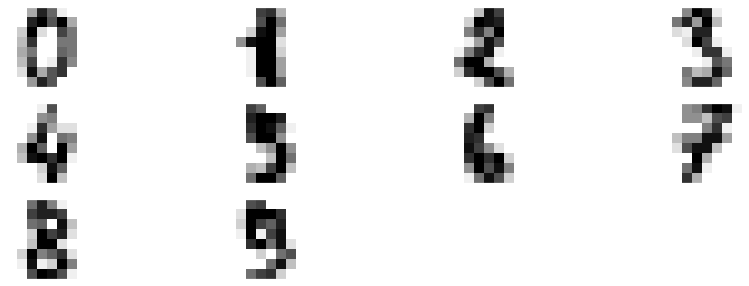

In [4]:
images = X[:10]

def plot_graph(images):
    images = [np.reshape(np.abs(image - 16), (8,8)) for image in images]
    fig, axes = plt.subplots(3, 4, figsize=(15, 5))
    for i, ax in zip(range(0,10), axes.flat):
        ax.imshow(images[i], cmap='gray', interpolation='none')
        ax.set(xticks=[], yticks=[])
    axes[2,2].set_visible(False)
    axes[2,3].set_visible(False)
    plt.show()

plot_graph(images)

# 2. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞

–ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–∞: –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –∏ –º–µ—Ç–æ–¥ $K$ —Å—Ä–µ–¥–Ω–∏—Ö ($K$-means clustering). –≠—Ç–∏ –∏ –¥—Ä—É–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –¥–æ—Å—Ç—É–ø–Ω—ã –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ scikit-learn –≤ –ø–æ–¥–º–æ–¥—É–ª–µ `cluster`. –ò–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è `AgglomerativeClustering`, –∞ –º–µ—Ç–æ–¥ $K$ —Å—Ä–µ–¥–Ω–∏—Ö ‚Äì `KMeans`.

–ò–Ω—Ç–µ—Ä—Ñ–µ–π—Å —É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –≤ scikit-learn –ø—Ä–æ—Å—Ç–æ–π –∏ –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–π:
- –ß—Ç–æ–±—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å, –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å —ç–∫–∑–µ–º–ø–ª—è—Ä —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–æ –≤—Å–µ–º–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, —É –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–π –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è `n_clusters`, —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –º—ã —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å –Ω–∞ –≤—ã—Ö–æ–¥–µ.
- –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—É—é –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –æ–±—É—á–∏—Ç—å, –≤—ã–∑–≤–∞–≤ –º–µ—Ç–æ–¥ `fit`.
- –° –ø–æ–º–æ—â—å—é –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å, –≤—ã–∑—ã–≤–∞—è –º–µ—Ç–æ–¥ `predict`.

–ö–∞–∫ –≤–∏–¥–Ω–æ, —ç—Ç–æ—Ç –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —Ö–æ—Ä–æ—à —Ç–æ–ª—å–∫–æ –¥–ª—è –∑–∞–¥–∞—á –æ–±—É—á–µ–Ω–∏—è —Å —É—á–∏—Ç–µ–ª–µ–º, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —á—ë—Ç–∫–æ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã —Ñ–∞–∑—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å –µ—ë –ø–æ–º–æ—â—å—é. –£ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–π –∑–∞—Ç–æ –µ—Å—Ç—å –º–µ—Ç–æ–¥ `fit_predict`, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–∑–±–∏–≤–∞–µ—Ç –≤—Ö–æ–¥–Ω—É—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä—ã –∏ —Å—Ä–∞–∑—É –∂–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞–∑–±–∏–µ–Ω–∏—è.

**(0.5 –±–∞–ª–ª–∞)** –ò—Å–ø–æ–ª—å–∑—É—è –∫–∞–∂–¥—ã–π –∏–∑ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤, –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –∏ $K$ —Å—Ä–µ–¥–Ω–∏—Ö, –ø–æ–ª—É—á–∏—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ `X` –Ω–∞ 10 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –û–±–∞ —Ä–∞–∑–∞ –¥–æ–ª–∂–µ–Ω –ø–æ–ª—É—á–∏—Ç—å—Å—è –º–∞—Å—Å–∏–≤ –∏–∑ 1797 —á–∏—Å–µ–ª ‚Äì –Ω–æ–º–µ—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.
- `KMeans` –¥–µ–ª–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 10) –∑–∞–ø—É—Å–∫–æ–≤ —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º–∏ —Ü–µ–Ω—Ç—Ä–∞–º–∏ –∏ –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–∞–∑–±–∏–µ–Ω–∏–π –≤—ã–≤–æ–¥–∏—Ç –ª—É—á—à–µ–µ –≤ —Ç–µ—Ä–º–∏–Ω–∞—Ö —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –ß—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π, –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å —á–∏—Å–ª–æ –∑–∞–ø—É—Å–∫–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ 100. –≠—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä `n_init` –≤ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä–µ.

In [5]:
y_pred_aggl_clus = AgglomerativeClustering(n_clusters=10).fit_predict(X)
y_pred_k_means = KMeans(n_clusters=10, n_init=100, random_state=42).fit_predict(X)

**(1 –±–∞–ª–ª)** –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∫–∞–∂–¥—ã–º –∏–∑ –¥–≤—É—Ö —Å–ø–æ—Å–æ–±–æ–≤. –≠—Ç–æ –æ–ø—è—Ç—å –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–∞ —Å–µ—Ç–∫–µ 3 $\times$ 4 —Å –±–µ–ª—ã–º —Ñ–æ–Ω–æ–º –∏ —Ç—ë–º–Ω—ã–º–∏ –∫–æ–Ω—Ç—É—Ä–∞–º–∏. –ü—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ: –∫–∞–∫–æ–π –∏–∑ –¥–≤—É—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –¥–∞—ë—Ç —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ —Ç–∏–ø–∏—á–Ω—ã–µ –Ω–∞—á–µ—Ä—Ç–∞–Ω–∏—è —Ü–∏—Ñ—Ä?

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –¶–µ–Ω—Ç—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ ‚Äì —ç—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ –ø–æ –≤—Å–µ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º, –≤—Ö–æ–¥—è—â–∏–º –≤ –∫–ª–∞—Å—Ç–µ—Ä, —Ç. –µ. –ø–æ –∫–∞–∫–æ–º—É-—Ç–æ –Ω–∞–±–æ—Ä—É —Å—Ç—Ä–æ–∫ –∏–∑ `X`.
- –ß—Ç–æ–±—ã –≤—ã–±—Ä–∞—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –≤—Ö–æ–¥—è—â–∏–µ –≤ –∫–ª–∞—Å—Ç–µ—Ä –Ω–æ–º–µ—Ä `i`, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∏–Ω–¥–µ–∫—Å–∞—Ü–∏—é –ø–æ –±—É–ª–µ–≤–æ–∑–Ω–∞—á–Ω–æ–π –º–∞—Å–∫–µ. –°–∞–º—É –º–∞—Å–∫—É –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∏–∑ –º–∞—Å—Å–∏–≤–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –Ω–æ–º–µ—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ —á–∏—Å–ª–∞ `i` –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º `==`.
- –£—Å—Ä–µ–¥–Ω—è—Ç—å NumPy-–º–∞—Å—Å–∏–≤ –≤–¥–æ–ª—å –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –∏–∑ –æ—Å–µ–π —É–º–µ–µ—Ç —Ñ—É–Ω–∫—Ü–∏—è `np.mean`. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å–æ —Å–ø—Ä–∞–≤–∫–æ–π –∫ –Ω–µ–π. –ù–∞–º –Ω—É–∂–Ω–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø–æ —Å—Ç—Ä–æ–∫–∞–º.

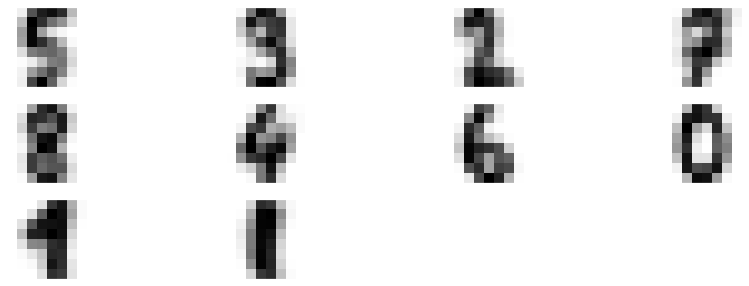

In [6]:
# –¶–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
centers = []
for i in range(0, 10):
    centers.append(np.mean(X[y_pred_aggl_clus == i], axis=0))
    
plot_graph(centers)

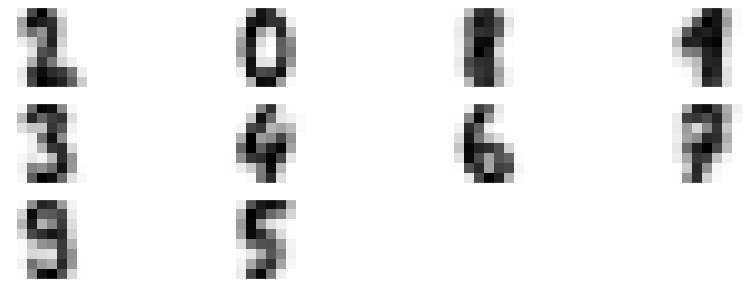

In [7]:
# –¶–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –ö —Å—Ä–µ–¥–Ω–∏—Ö
centers = []
for i in range(0, 10):
    centers.append(np.mean(X[y_pred_k_means == i], axis=0))

plot_graph(centers)

–û–±–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–í —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –∏—Å—Ç–∏–Ω–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ, –ø–æ–¥–±–∏—Ä–∞—é—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º —É—á–∏—Ç—ã–≤–∞—é—Ç –¥–≤–µ –≤–µ–ª–∏—á–∏–Ω—ã: –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –ª—É—á—à–µ) –∏ –º–µ–∂–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –ª—É—á—à–µ). –¢–∞–∫ –∫–∞–∫ –¥–≤–µ —ç—Ç–∏ –≤–µ–ª–∏—á–∏–Ω—ã –Ω–µ –¥–æ—Å—Ç–∏–≥–∞—é—Ç –æ–ø—Ç–∏–º—É–º–∞ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, –æ–±—ã—á–Ω–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É—é—Ç –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –æ—Ç –Ω–∏—Ö. –û–¥–∏–Ω –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è "—Å–∏–ª—É—ç—Ç" (silhouette). –í–æ—Ç –∫–∞–∫ –æ–Ω –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è.

–ü—É—Å—Ç—å $X$ ‚Äì –º–Ω–æ–∂–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, $M \subset X$ ‚Äì –æ–¥–∏–Ω –∏–∑ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –æ–Ω–æ —Ä–∞–∑–±–∏—Ç–æ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, $\rho$ ‚Äì –º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ $X$. –í—ã–±–µ—Ä–µ–º –∫–∞–∫–æ–µ-–Ω–∏–±—É–¥—å –æ–¥–Ω–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ $x \in M$. –û–±–æ–∑–Ω–∞—á–∏–º $a(x)$ —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç $x$ –¥–æ —Ç–æ—á–µ–∫ $x'$ –∏–∑ —Ç–æ–≥–æ –∂–µ –∫–ª–∞—Å—Ç–µ—Ä–∞:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

–û–±–æ–∑–Ω–∞—á–∏–º $b(x)$ –º–∏–Ω–∏–º—É–º —Å—Ä–µ–¥–Ω–∏—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –æ—Ç $x$ –¥–æ —Ç–æ—á–µ–∫ $x''$ –∏–∑ –∫–∞–∫–æ–≥–æ-–Ω–∏–±—É–¥—å –¥—Ä—É–≥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

–°–∏–ª—É—ç—Ç ‚Äì —ç—Ç–æ —Ä–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ –∏ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π, –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –¥–æ –æ—Ç—Ä–µ–∑–∫–∞ $[-1,\, 1]$ –∏ —É—Å—Ä–µ–¥–Ω—ë–Ω–Ω–∞—è –ø–æ –≤—Å–µ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

–í scikit-learn —Å–∏–ª—É—ç—Ç —Å—á–∏—Ç–∞–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏–µ–π `silhouette_score` –∏–∑ –ø–æ–¥–º–æ–¥—É–ª—è `metrics`. –ù–∞ –≤—Ö–æ–¥ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –º–∞—Å—Å–∏–≤ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

**(1.5 –±–∞–ª–ª–∞)** –î–ª—è —á–∏—Å–ª–∞ $K$ –æ—Ç 2 –¥–æ 20 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –ø–æ–ª—É—á–∏—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ `X` –Ω–∞ $K$ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫–∞–∂–¥—ã–º –∏–∑ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∏–ª—É—ç—Ç. –ü–æ—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤ –≤–∏–¥–µ –≥—Ä–∞—Ñ–∏–∫–∞ –≤ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞—Ö: —á–∏—Å–ª–æ $K$ ‚Äì –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–ª—É—ç—Ç–∞. –ü—Ä–∏ –∫–∞–∫–æ–º —á–∏—Å–ª–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º —Å–∏–ª—É—ç—Ç–∞?

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –ù–µ –∑–∞–±—É–¥—å—Ç–µ, —á—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è `range` –Ω–µ –∑–∞—Ö–≤–∞—Ç—ã–≤–∞–µ—Ç –ø—Ä–∞–≤—ã–π –∫–æ–Ω–µ—Ü –¥–∏–∞–ø–∞–∑–æ–Ω–∞.
- –ü–æ–¥ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ –º–æ–∂–Ω–æ –∑–∞–≤–µ—Å—Ç–∏ –¥–≤–∞ —Å–ø–∏—Å–∫–∞: –æ–¥–∏–Ω –¥–ª—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, –¥—Ä—É–≥–æ–π –¥–ª—è $K$ —Å—Ä–µ–¥–Ω–∏—Ö.
- –†–∏—Å–æ–≤–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ —É–º–µ–µ—Ç —Ñ—É–Ω–∫—Ü–∏—è `plt.plot`. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å–æ —Å–ø—Ä–∞–≤–∫–æ–π –∫ –Ω–µ–π.
- –ù–∞ –æ–¥–Ω–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ –º–æ–∂–Ω–æ —Ä–∞–∑–º–µ—Å—Ç–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –≥—Ä–∞—Ñ–∏–∫–æ–≤, —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö –≤—ã–∑–æ–≤–æ–≤ `plt.plot`.
- –ß—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å –ª–µ–≥–µ–Ω–¥—É (–ø–æ–¥–ø–∏—Å–∏ –∫ –≥—Ä–∞—Ñ–∏–∫–∞–º), –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ñ—É–Ω–∫—Ü–∏–µ–π `plt.legend`. –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º `loc`.
- –ß—Ç–æ–±—ã –ø–æ–¥–ø–∏—Å–∞—Ç—å –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–Ω—ã–µ –æ—Å–∏, –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ñ—É–Ω–∫—Ü–∏—è–º–∏ `plt.xlabel` –∏ `plt.ylabel`.

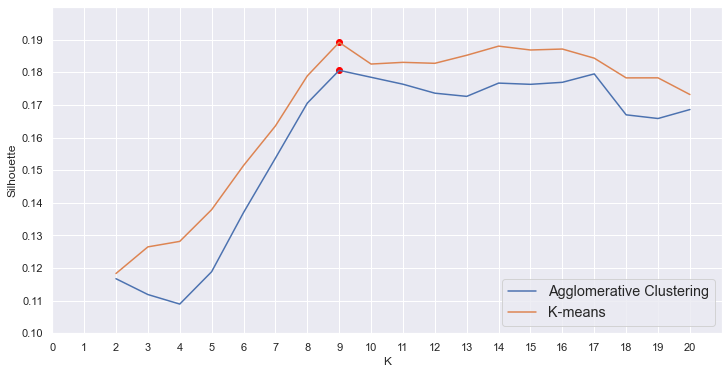

Maximum silhouette for agglomerative clustering: {'score': 0.18061975703867697, 'K': 9}
Maximum silhouette for K-means: {'score': 0.1891928164889673, 'K': 9}


In [8]:
silhouette_aggl_clus = []
silhouette_k_means = []
max_sil_aggl_clus = {'score': 0, 'K': 0}
max_sil_k_means = {'score': 0, 'K': 0}
for K in range(2,21):
    y_pred_aggl_clus = AgglomerativeClustering(n_clusters=K).fit_predict(X)
    current_score = silhouette_score(X, y_pred_aggl_clus)
    silhouette_aggl_clus.append(current_score)
    if current_score > max_sil_aggl_clus['score']:
        max_sil_aggl_clus['score'] = current_score
        max_sil_aggl_clus['K'] = K
    
    y_pred_k_means = KMeans(n_clusters=K, n_init=100, random_state=42).fit_predict(X)
    current_score = silhouette_score(X, y_pred_k_means)
    silhouette_k_means.append(current_score)
    if current_score > max_sil_k_means['score']:
        max_sil_k_means['score'] = current_score
        max_sil_k_means['K'] = K

plt.figure(figsize=(12, 6))    
plt.plot(range(2,21), silhouette_aggl_clus, label='Agglomerative Clustering')
plt.plot(range(2,21), silhouette_k_means, label='K-means')
plt.scatter(max_sil_aggl_clus['K'], max_sil_aggl_clus['score'], c='red')
plt.scatter(max_sil_k_means['K'], max_sil_k_means['score'], c='red')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.xlim(0, 21)
plt.ylim(0.1, 0.2)
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0.1, 0.2, 0.01))
plt.legend(loc='lower right', fontsize='large')
plt.show()

print(f'Maximum silhouette for agglomerative clustering: {max_sil_aggl_clus}')
print(f'Maximum silhouette for K-means: {max_sil_k_means}')

–ú–∞–∫—Å–∏–º—É–º —Å–∏–ª—É—ç—Ç–∞ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ä–∞–≤–Ω–æ–º –¥–µ–≤—è—Ç–∏.

–ö–æ–≥–¥–∞ –∏–∑–≤–µ—Å—Ç–Ω–æ "–ø—Ä–∞–≤–∏–ª—å–Ω–æ–µ" (–≤ –∫–∞–∫–æ–º-–Ω–∏–±—É–¥—å —Å–º—ã—Å–ª–µ) —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –º–æ–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –Ω–∏–º, –∏—Å–ø–æ–ª—å–∑—É—è —Ç–∞–∫–∏–µ –º–µ—Ä—ã, –∫–∞–∫ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç—å (homogeneity), –ø–æ–ª–Ω–æ—Ç–∞ (completeness) –∏ –∏—Ö —Å—Ä–µ–¥–Ω–µ–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–µ ‚Äì $V$-–º–µ—Ä–∞. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç—Ç–∏—Ö –≤–µ–ª–∏—á–∏–Ω –¥–æ–≤–æ–ª—å–Ω–æ –≥—Ä–æ–º–æ–∑–¥–∫–∏–µ –∏ –æ—Å–Ω–æ–≤–∞–Ω—ã –Ω–∞ –ø–æ–Ω—è—Ç–∏–∏ [—ç–Ω—Ç—Ä–æ–ø–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π](https://ru.wikipedia.org/wiki/–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è_—ç–Ω—Ç—Ä–æ–ø–∏—è); –ø–æ–¥—Ä–æ–±–Ω–æ—Å—Ç–∏ –∏–∑–ª–∞–≥–∞—é—Ç—Å—è –≤ [—ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ](http://aclweb.org/anthology/D/D07/D07-1043.pdf). –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∑–Ω–∞—Ç—å, —á—Ç–æ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç—å, –ø–æ–ª–Ω–æ—Ç–∞ –∏ $V$-–º–µ—Ä–∞ –∑–∞–∫–ª—é—á–µ–Ω—ã –º–µ–∂–¥—É –Ω—É–ª—ë–º –∏ –µ–¥–∏–Ω–∏—Ü–µ–π ‚Äì —á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –ª—É—á—à–µ.

–¢–∞–∫ –∫–∞–∫ –º—ã –∑–Ω–∞–µ–º, –∫–∞–∫—É—é —Ü–∏—Ñ—Ä—É –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –∏–∑–æ–±—Ä–∞–∂–∞–µ—Ç –∫–∞–∂–¥–∞—è –∫–∞—Ä—Ç–∏–Ω–∫–∞ (—ç—Ç–æ –º–∞—Å—Å–∏–≤ `y`), –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç—å, –ø–æ–ª–Ω–æ—Ç—É –∏ $V$-–º–µ—Ä—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —ç—Ç–∏—Ö –≤–µ–ª–∏—á–∏–Ω –¥–æ—Å—Ç—É–ø–Ω—ã –≤ scikit-learn, –≤ –ø–æ–¥–º–æ–¥—É–ª–µ `metrics`, –ø–æ–¥ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ `homogeneity_score`, `completeness_score`, `v_measure_score`. –ö–∞–∫ –≤–∞—Ä–∏–∞–Ω—Ç, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é `homogeneity_completeness_v_measure`, –∫–æ—Ç–æ—Ä–∞—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å—Ä–∞–∑—É —Ç—Ä–æ–π–∫—É —á–∏—Å–µ–ª.

**(1 –±–∞–ª–ª)** –ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–µ –∑–∞–¥–∞–Ω–∏–µ, –∏—Å–ø–æ–ª—å–∑—É—è $V$-–º–µ—Ä—É –≤–º–µ—Å—Ç–æ —Å–∏–ª—É—ç—Ç–∞. –ü—Ä–∏ –∫–∞–∫–æ–º —á–∏—Å–ª–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º $V$-–º–µ—Ä—ã?

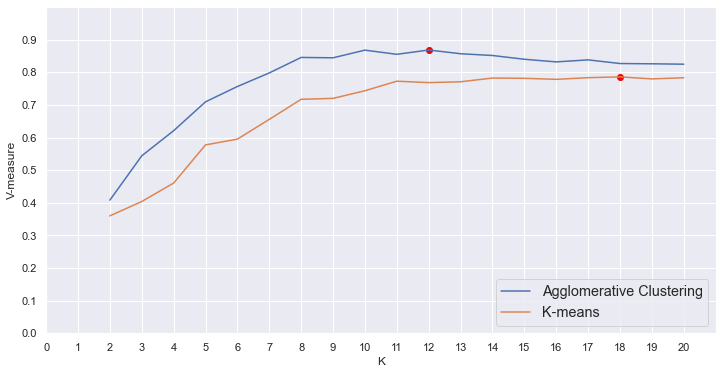

Maximum V-measure for agglomerative clustering: {'score': 0.86854875186737, 'K': 12}
Maximum V-measure for K-means: {'score': 0.7861749886360692, 'K': 18}


In [9]:
v_measure_aggl_clus = []
v_measure_k_means = []
max_v_measure_aggl_clus = {'score': 0, 'K': 0}
max_v_measure_k_means = {'score': 0, 'K': 0}
for K in range(2,21):
    y_pred_aggl_clus = AgglomerativeClustering(n_clusters=K).fit_predict(X)
    current_score = v_measure_score(y, y_pred_aggl_clus)
    v_measure_aggl_clus.append(current_score)
    if current_score > max_v_measure_aggl_clus['score']:
        max_v_measure_aggl_clus['score'] = current_score
        max_v_measure_aggl_clus['K'] = K
    
    y_pred_k_means = KMeans(n_clusters=K, n_init=100, random_state=42).fit_predict(X)
    current_score = v_measure_score(y, y_pred_k_means)
    v_measure_k_means.append(current_score)
    if current_score > max_v_measure_k_means['score']:
        max_v_measure_k_means['score'] = current_score
        max_v_measure_k_means['K'] = K

plt.figure(figsize=(12, 6))    
plt.plot(range(2,21), v_measure_aggl_clus, label='Agglomerative Clustering')
plt.plot(range(2,21), v_measure_k_means, label='K-means')
plt.scatter(max_v_measure_aggl_clus['K'], max_v_measure_aggl_clus['score'], c='red')
plt.scatter(max_v_measure_k_means['K'], max_v_measure_k_means['score'], c='red')
plt.xlabel('K')
plt.ylabel('V-measure')
plt.xlim(0, 21)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(loc='lower right', fontsize='large')
plt.show()

print(f'Maximum V-measure for agglomerative clustering: {max_v_measure_aggl_clus}')
print(f'Maximum V-measure for K-means: {max_v_measure_k_means}')

–ú–∞–∫—Å–∏–º—É–º ùëâ-–º–µ—Ä—ã –¥–ª—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ K=12, –¥–ª—è K-—Å—Ä–µ–¥–Ω–∏—Ö –ø—Ä–∏ –ö=18.

# 3. –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞

–ò–Ω–æ–≥–¥–∞, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–Ω–æ–≥–æ –∏ –Ω–µ –≤—Å–µ –æ–Ω–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ, –±—ã–≤–∞–µ—Ç –ø–æ–ª–µ–∑–Ω–æ —Å–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞, —Ç–æ –µ—Å—Ç—å –≤–º–µ—Å—Ç–æ $d$ –∏—Å—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–π—Ç–∏ –∫ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—é $d' \ll d$ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –î–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –º–∞—Ç—Ä–∏—Ü–µ–π $n$ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π $\times$ $d$ –∏—Å—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ —Ç–µ–ø–µ—Ä—å –±—É–¥—É—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –º–∞—Ç—Ä–∏—Ü–µ–π $n$ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π $\times$ $d'$ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–ï—Å—Ç—å –¥–≤–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –ø–æ–¥—Ö–æ–¥–∞ –∫ —Å–Ω–∏–∂–µ–Ω–∏—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏:
- –æ—Ç–æ–±—Ä–∞—Ç—å (select) –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ —á–∏—Å–ª–∞ –∏–º–µ—é—â–∏—Ö—Å—è;
- –∏–∑–≤–ª–µ—á—å (extract) –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø—Ä–µ–æ–±—Ä–∞–∑—É—è —Å—Ç–∞—Ä—ã–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–¥–µ–ª–∞—Ç—å $d'$ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ª–∏–Ω–µ–π–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤ –∏—Å—Ö–æ–¥–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã $n \times d$.

–û–¥–Ω–∏–º –∏–∑ —à–∏—Ä–æ–∫–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —è–≤–ª—è–µ—Ç—Å—è —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã (singular value decomposition, SVD). –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞—Ç—å –ª—é–±–æ–µ —á–∏—Å–ª–æ $d' \le d$ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ –æ–Ω–∏ –±—É–¥—É—Ç, –≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–º —Å–º—ã—Å–ª–µ, –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏. –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –¥–µ—Ç–∞–ª–∏ —Å–µ–π—á–∞—Å –Ω–µ –≤–∞–∂–Ω—ã; –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å –Ω–∏–º–∏ –º–æ–∂–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, [–∑–¥–µ—Å—å](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(–ø–æ-—Ä—É—Å—Å–∫–∏) –∏–ª–∏ [–∑–¥–µ—Å—å](https://www.youtube.com/watch?v=P5mlg91as1c) (–ø–æ-–∞–Ω–≥–ª–∏–π—Å–∫–∏).

–í scikit-learn –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è. –ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å `TruncatedSVD` –∏–∑ –ø–æ–¥–º–æ–¥—É–ª—è `decomposition`. –í –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –æ–¥–∏–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä `n_components` ‚Äì –∂–µ–ª–∞–µ–º–æ–µ —á–∏—Å–ª–æ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ú–µ—Ç–æ–¥ `fit_transform` –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–æ–≤—É—é –º–∞—Ç—Ä–∏—Ü—É —Å —Ç–∞–∫–∏–º –∂–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å—Ç—Ä–æ–∫, –∫–∞–∫ –ø—Ä–µ–∂–¥–µ, –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å—Ç–æ–ª–±—Ü–æ–≤, —Ä–∞–≤–Ω—ã–º —á–∏—Å–ª—É –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

<u>–ó–∞–º–µ—á–∞–Ω–∏–µ:</u> –°–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã $M$ –æ–±—ã—á–Ω–æ –ø–∏—à—É—Ç –≤ –≤–∏–¥–µ $M = U \Sigma V^{*}$, –≥–¥–µ $U$, $\Sigma$ –∏ $V$ ‚Äì –Ω–µ–∫–∏–µ –º–∞—Ç—Ä–∏—Ü—ã —Å —Ö–æ—Ä–æ—à–∏–º–∏ —Å–≤–æ–π—Å—Ç–≤–∞–º–∏. –¢–æ, —á—Ç–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º `TruncatedSVD`, ‚Äì —ç—Ç–æ —Å–∫–æ–ª—å–∫–æ-—Ç–æ (—Å–∫–æ–ª—å–∫–æ –º—ã —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å) –ø–µ—Ä–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã $U$.

**(1.5 –±–∞–ª–ª–∞)** –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã `X`, –æ—Å—Ç–∞–≤–ª—è—è 2, 5, 10, 20 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –í –∫–∞–∂–¥–æ–º —Å–ª—É—á–∞–µ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∏ $K$-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (—á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—Ä–∏–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º 10). –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ –∏ $V$-–º–µ—Ä—ã. –£–¥–∞–ª–æ—Å—å –ª–∏ –ø—Ä–∏ –∫–∞–∫–æ–º-–Ω–∏–±—É–¥—å $d'$ –ø–æ–ª—É—á–∏—Ç—å —Å–∏–ª—É—ç—Ç –∏ / –∏–ª–∏ $V$-–º–µ—Ä—É –ª—É—á—à–µ, —á–µ–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö?

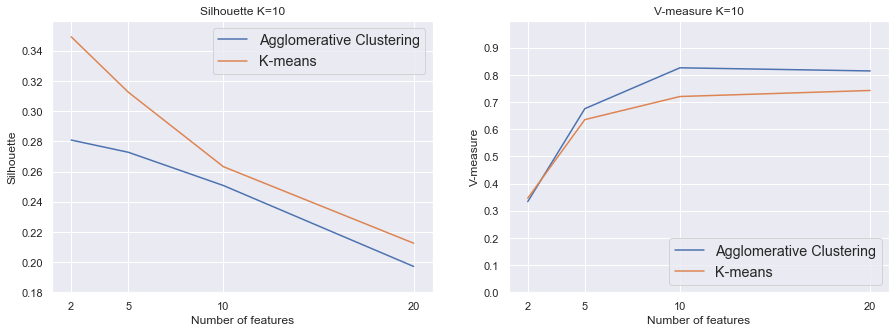

In [10]:
silhouette_aggl_clus = []
silhouette_k_means = []
v_measure_aggl_clus = []
v_measure_k_means = []
for n_features in [2, 5, 10, 20]:
    X_transformed = TruncatedSVD(n_components=n_features, random_state=42).fit_transform(X)
    y_pred_aggl_clus = AgglomerativeClustering(n_clusters=10).fit_predict(X_transformed)
    silhouette_aggl_clus.append(silhouette_score(X_transformed, y_pred_aggl_clus))
    v_measure_aggl_clus.append(v_measure_score(y, y_pred_aggl_clus))
    y_pred_k_means = KMeans(n_clusters=10, n_init=100, random_state=42).fit_predict(X_transformed)
    silhouette_k_means.append(silhouette_score(X_transformed, y_pred_k_means))
    v_measure_k_means.append(v_measure_score(y, y_pred_k_means))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot([2, 5, 10, 20], silhouette_aggl_clus, label='Agglomerative Clustering')
ax1.plot([2, 5, 10, 20], silhouette_k_means, label='K-means')
ax1.set(xlabel='Number of features', ylabel='Silhouette')
ax1.set_title('Silhouette K=10')
ax1.set(xlim=(1, 21), ylim=(0.18, 0.36))
ax1.set_xticks([2, 5, 10, 20])
ax1.set_yticks(np.arange(0.18, 0.36, 0.02))
ax1.legend(loc='upper right', fontsize='large')

ax2.plot([2, 5, 10, 20], v_measure_aggl_clus, label='Agglomerative Clustering')
ax2.plot([2, 5, 10, 20], v_measure_k_means, label='K-means')
ax2.set(xlabel='Number of features', ylabel='V-measure')
ax2.set_title('V-measure K=10')
ax2.set(xlim=(1, 21), ylim=(0, 1))
ax2.set_xticks([2, 5, 10, 20]);
ax2.set_yticks(np.arange(0, 1, 0.1))
ax2.legend(loc='lower right', fontsize='large');

–ë—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –±–æ–ª–µ–µ –ª—É—á—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Å–∏–ª—É—ç—Ç–∞. –î–ª—è V-–º–µ—Ä—ã –∑–Ω–∞—á–µ–Ω–∏—è —á—É—Ç—å —É—Ö—É–¥—à–∏–ª–∏—Å—å.

–î—Ä—É–≥–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏, ‚Äì —ç—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º t-distributed stochastic neighbor embeddings, —Å–æ–∫—Ä–∞—â—ë–Ω–Ω–æ tSNE. –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–≥–æ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏—è, —ç—Ç–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–µ. –ï–≥–æ –æ—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è ‚Äì –æ—Ç–æ–±—Ä–∞–∑–∏—Ç—å —Ç–æ—á–∫–∏ –∏–∑ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ $d$ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ 2 –∏–ª–∏ 3 (–æ–±—ã—á–Ω–æ 2, —Ç–æ –µ—Å—Ç—å –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç—å) —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –∫–∞–∫ –º–æ–∂–Ω–æ —Ç–æ—á–Ω–µ–µ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –¥–µ—Ç–∞–ª–∏ –µ—Å—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, [–∑–¥–µ—Å—å](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), –Ω–æ –æ–Ω–∏ –Ω–µ—Ç—Ä–∏–≤–∏–∞–ª—å–Ω—ã.

–í –±–∏–±–ª–∏–æ—Ç–µ–∫–µ scikit-learn —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–µ–π tSNE —è–≤–ª—è–µ—Ç—Å—è –∫–ª–∞—Å—Å `TSNE` –≤ –ø–æ–¥–º–æ–¥—É–ª–µ `manifold`. –í –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä –º–æ–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä `n_components`, –∞ –º–æ–∂–Ω–æ –∏ –Ω–µ –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å: –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –æ–Ω —Ä–∞–≤–µ–Ω 2. –ú–µ—Ç–æ–¥ `fit_transform` —Ä–∞–±–æ—Ç–∞–µ—Ç –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ç–æ–º—É, –∫–∞–∫ –∏ —É `TruncatedSVD`.

<u>–ó–∞–º–µ—á–∞–Ω–∏–µ:</u> –í –ø–æ—Å–ª–µ–¥–Ω–∏–µ –≥–æ–¥—ã –≤–º–µ—Å—Ç–æ tSNE –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è [UMAP](https://github.com/lmcinnes/umap), –±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º —Å –ø–æ—Ö–æ–∂–∏–º–∏ —Å–≤–æ–π—Å—Ç–≤–∞–º–∏. –í —ç—Ç–æ–π –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç–µ –Ω–µ –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å UMAP, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª–æ –±—ã —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –µ—â—ë –æ–¥–Ω—É –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å -- –±–∏–±–ª–∏–æ—Ç–µ–∫—É `umap-learn`. –ñ–µ–ª–∞—é—â–∏–µ –º–æ–≥—É—Ç –ø—Ä–æ–¥–µ–ª–∞—Ç—å –∑–∞–¥–∞–Ω–∏—è –Ω–∞ tSNE —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º UMAP; –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `n_neighbors` –∏ `min_dist`, –∫–æ—Ç–æ—Ä—ã–º–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –≤–∏–¥ –ø—Ä–æ–µ–∫—Ü–∏–∏.

**(0.5 –±–∞–ª–ª–∞)** –í—ã–ø–æ–ª–Ω–∏—Ç–µ tSNE-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã `X`, –æ—Å—Ç–∞–≤–∏–≤ 2 –ø—Ä–∏–∑–Ω–∞–∫–∞. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤ –≤–∏–¥–µ —Ç–æ—á–µ—á–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã: –ø–µ—Ä–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤–¥–æ–ª—å –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –æ—Å–∏, –≤—Ç–æ—Ä–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –≤–¥–æ–ª—å –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–π –æ—Å–∏. –ü–æ–¥—Å–≤–µ—Ç–∏—Ç–µ —Ä–∞–∑–Ω—ã–º–∏ —Ü–≤–µ—Ç–∞–º–∏ –≥—Ä—É–ø–ø—ã —Ç–æ—á–µ–∫, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ä–∞–∑–Ω—ã–º —Ü–∏—Ñ—Ä–∞–º.

*–£–∫–∞–∑–∞–Ω–∏—è:*
- –¢–æ—á–µ—á–Ω—É—é –¥–∏–∞–≥—Ä–∞–º–º—É —É–º–µ–µ—Ç —Ä–∏—Å–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—è `plt.scatter`. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å–æ —Å–ø—Ä–∞–≤–∫–æ–π –∫ –Ω–µ–π.
- –ó–∞ —Ü–≤–µ—Ç–∞ —Ç–æ—á–µ–∫ –æ—Ç–≤–µ—á–∞–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä `c` —É —Ñ—É–Ω–∫—Ü–∏–∏ `plt.scatter`. –ü–µ—Ä–µ–¥–∞—Ç—å –≤ –Ω–µ–≥–æ –Ω–∞–¥–æ –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤.

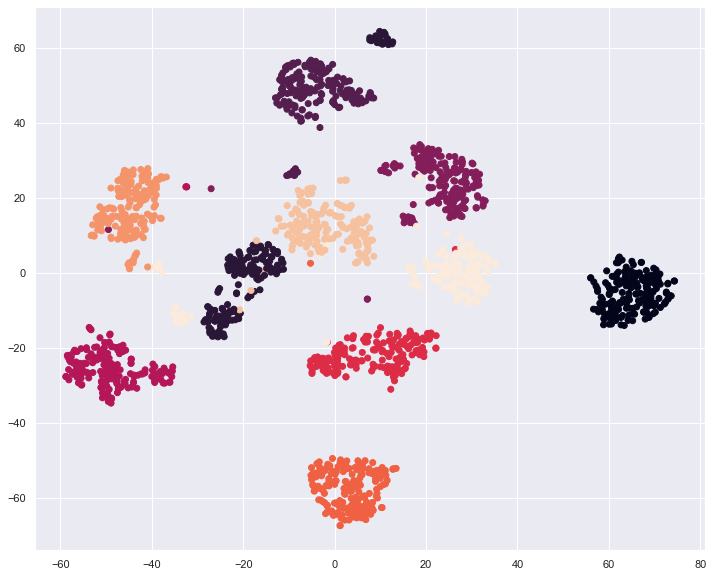

In [11]:
X_transformed = TSNE(random_state=42).fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y);

**(1 –±–∞–ª–ª)** –î–ª—è tSNE-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å 2 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫—É—é –∏ $K$-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é (—á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—Ä–∏–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º 10). –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—É—ç—Ç–∞ –∏ $V$-–º–µ—Ä—ã. –£–¥–∞–ª–æ—Å—å –ª–∏ –ø–æ–ª—É—á–∏—Ç—å —Å–∏–ª—É—ç—Ç –∏ / –∏–ª–∏ $V$-–º–µ—Ä—É –ª—É—á—à–µ, —á–µ–º –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö?

In [12]:
X_transformed = TSNE(random_state=42).fit_transform(X)

y_pred_aggl_clus = AgglomerativeClustering(n_clusters=10).fit_predict(X_transformed)
print(f'Silhouette score for agglomerative clustering (K=10): {silhouette_score(X_transformed, y_pred_aggl_clus)}')
print(f'V-measure score for agglomerative clustering (K=10): {v_measure_score(y, y_pred_aggl_clus)}')
y_pred_k_means = KMeans(n_clusters=10, n_init=100, random_state=42).fit_predict(X_transformed)
print(f'Silhouette score for K-means (K=10): {silhouette_score(X_transformed, y_pred_k_means)}')
print(f'V-measure score for K-means (K=10): {v_measure_score(y, y_pred_k_means)}')

Silhouette score for agglomerative clustering (K=10): 0.6421834230422974
V-measure score for agglomerative clustering (K=10): 0.9111471953871231
Silhouette score for K-means (K=10): 0.6432376503944397
V-measure score for K-means (K=10): 0.9137798316714034


–ó–Ω–∞—á–µ–Ω–∏—è V-–º–µ—Ä—ã –∏ —Å–∏–ª—É—ç—Ç–∞, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è TSNE, –∫–∞–∫ –¥–ª—è –ö —Å—Ä–µ–¥–Ω–∏—Ö, —Ç–∞–∫ –∏ –¥–ª—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—è—Ç –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–∞–Ω–µ–µ

**(0.5 –±–∞–ª–ª–∞)** –î–ª—è —Å–∞–º–æ–≥–æ –ª—É—á—à–µ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä–æ–µ –≤–∞–º —É–¥–∞–ª–æ—Å—å –ø–æ–ª—É—á–∏—Ç—å (–Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ, –ª—É—á—à–µ–≥–æ –≤ —Ç–µ—Ä–º–∏–Ω–∞—Ö —Å–∏–ª—É—ç—Ç–∞ –∏–ª–∏ $V$-–º–µ—Ä—ã), –æ–ø—è—Ç—å –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –£–¥–∞–ª–æ—Å—å –ª–∏ –¥–æ–±–∏—Ç—å—Å—è, —á—Ç–æ–±—ã –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Ç–µ—Ä —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞–ª –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –æ–¥–Ω–æ–π —Ü–∏—Ñ—Ä–µ?

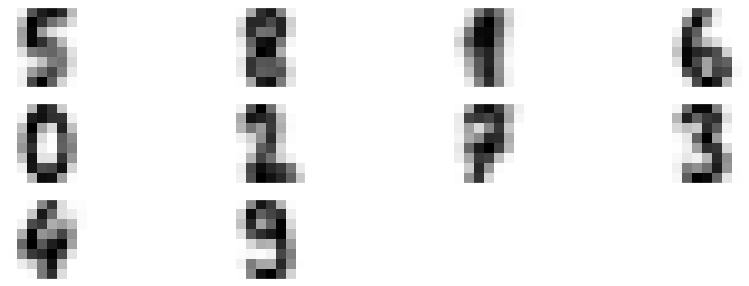

In [13]:
# –í—ã–±–∏—Ä–∞–µ–º –ö-—Å—Ä–µ–¥–Ω–∏—Ö –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è TSNE –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
X_transformed = TSNE(random_state=42).fit_transform(X)
y_pred = KMeans(n_clusters=10, n_init=100, random_state=42).fit_predict(X_transformed)
centers = []
for i in range(0, 10):
    centers.append(np.mean(X[y_pred == i], axis=0))
plot_graph(centers)

–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å—Ç–∞–ª–∏ –±–æ–ª–µ–µ —Ä–∞–∑–ª–∏—á–∏–º–µ–µ, —á–µ–º –≤ –ø–µ—Ä–≤—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞—Ö.

# 4. –ò—Ç–æ–≥–∏, –±–æ–Ω—É—Å

**(1 –±–∞–ª–ª)** –ù–∞–ø–∏—à–∏—Ç–µ –≤ —Å–≤–æ–±–æ–¥–Ω–æ–π —Ñ–æ—Ä–º–µ, –∫–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –≤—ã —Å–¥–µ–ª–∞–ª–∏ –∏–∑ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã. –û—Ç–≤–µ—Ç—å—Ç–µ, –∫–∞–∫ –º–∏–Ω–∏–º—É–º, –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –¥–≤–∞ –≤–æ–ø—Ä–æ—Å–∞:
- –ö–∞–∫–æ–π –∏–∑ –¥–≤—É—Ö –º–µ—Ç–æ–¥–æ–≤ –¥–∞—ë—Ç –±–æ–ª–µ–µ –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã ‚Äì –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏–ª–∏ –∞–ª–≥–æ—Ä–∏—Ç–º $K$ —Å—Ä–µ–¥–Ω–∏—Ö? –ó–∞–≤–∏—Å–∏—Ç –ª–∏ —ç—Ç–æ –æ—Ç –Ω–∞—Å—Ç—Ä–æ–µ–∫ –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞? –û—Ç –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞?
- –£–¥–∞—ë—Ç—Å—è –ª–∏ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, —Å–Ω–∏–∂–∞—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞?

–ù–∞ –º–æ–π –≤–∑–≥–ª—è–¥ –æ–±–∞ –º–µ—Ç–æ–¥–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ü—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫ –¥–ª—è –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –Ω–µ –±—ã–ª–æ —è–≤–Ω–æ–≥–æ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ —É –æ–¥–Ω–æ–≥–æ –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤.
–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–¥–∞ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –ø–æ–º–æ–≥–ª–æ –Ω–µ–º–Ω–æ–≥–æ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

**(–ë–æ–Ω—É—Å–Ω—ã–µ 2 –±–∞–ª–ª–∞)** –°–∫–∞—á–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). –ö–∞–∫ —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ —Å –ø–æ–º–æ—â—å—é scikit-learn, –Ω–∞–ø–∏—Å–∞–Ω–æ [–∑–¥–µ—Å—å](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits ‚Äì —ç—Ç–æ 70 —Ç—ã—Å—è—á —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö —Ä—É–∫–æ–ø–∏—Å–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Ü–∏—Ñ—Ä, –∫–∞–∂–¥–æ–µ —Ä–∞–∑–º–µ—Ä–æ–º 28 $\times$ 28 –ø–∏–∫—Å–µ–ª–µ–π. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –ø—Ä–æ–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç –¥–∞—Ç–∞—Å–µ—Ç –∏ –¥–æ–±–∏—Ç—å—Å—è –∫–∞–∫ –º–æ–∂–Ω–æ –ª—É—á—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–∏–ª—É—ç—Ç–∞ –∏ $V$-–º–µ—Ä—ã.

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [15]:
# –ü—Ä–∏–º–µ–Ω–∏–º TSNE
X_transformed = TSNE(random_state=42, n_jobs=-1).fit_transform(X)

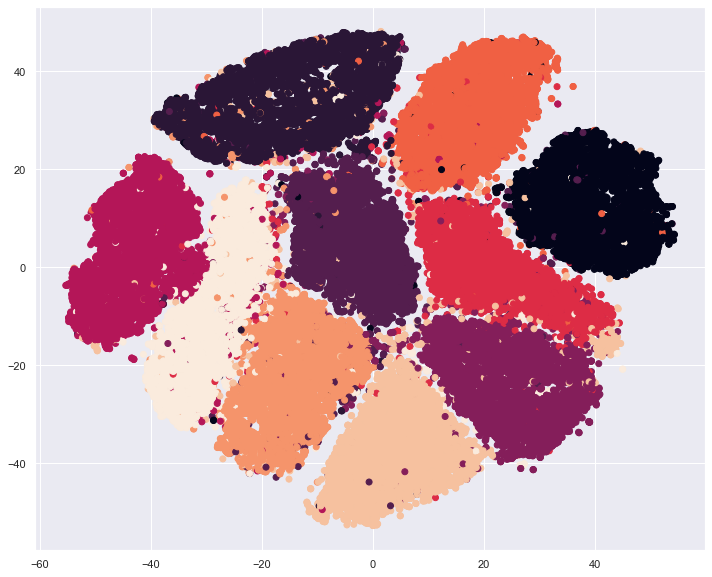

In [16]:
plt.figure(figsize=(12, 10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y.astype('int64'));

–î–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ö —Å—Ä–µ–¥–Ω–∏—Ö –∏–∑-–∑–∞ –µ–≥–æ –±—ã—Å—Ç—Ä–æ–¥–µ–π—Å—Ç–≤–∏—è.

In [17]:
y_pred_k_means = KMeans(n_clusters=10, n_init=20, random_state=42).fit_predict(X_transformed)
print(f'Silhouette score: {silhouette_score(X_transformed, y_pred_k_means)}')
print(f'V-measure score: {v_measure_score(y, y_pred_k_means)}')

Silhouette score: 0.3853907287120819
V-measure score: 0.7454022309479029


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ —Å–∞–º—ã–µ –ø–ª–æ—Ö–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–∏–ª—É—ç—Ç–∞ –∏ V-–º–µ—Ä—ã, –Ω–æ –¥–∞–ª—å–Ω–µ–π—à–∏–π –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è TSNE –Ω–µ–≤–æ–∑–º–æ–∂–µ–Ω –∏–∑-–∑–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–π UMAP

In [18]:
X_transformed_umap = UMAP(random_state=42, n_jobs=-1).fit_transform(X)

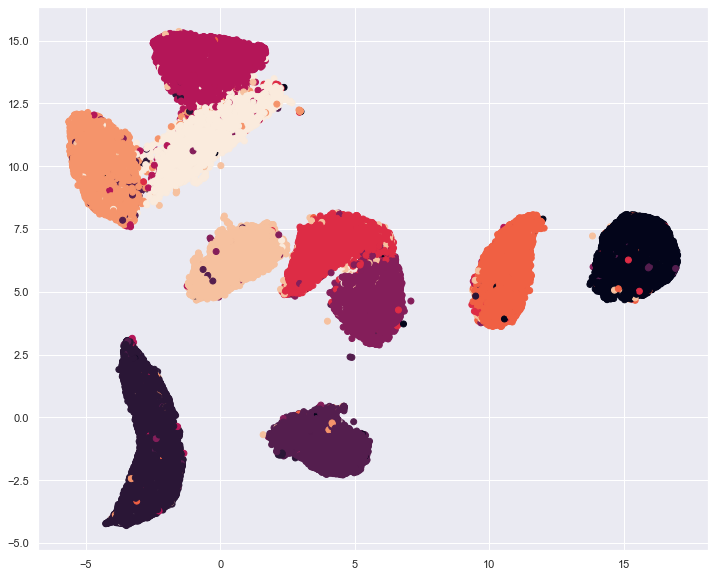

In [19]:
plt.figure(figsize=(12, 10))
plt.scatter(X_transformed_umap[:, 0], X_transformed_umap[:, 1], c=y.astype('int64'));

In [20]:
y_pred_k_means = KMeans(n_clusters=10, n_init=20, random_state=42).fit_predict(X_transformed_umap)
print(f'Silhouette score: {silhouette_score(X_transformed_umap, y_pred_k_means)}')
print(f'V-measure score: {v_measure_score(y, y_pred_k_means)}')

Silhouette score: 0.5910882353782654
V-measure score: 0.8606214267824859


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–∏–ª—É—ç—Ç–∞ –∏ V-–º–µ—Ä—ã, —á–µ–º –¥–ª—è TSNE. –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è UMAP

In [21]:
param_range = {
    'trans__min_dist': [0.05, 0.1],
    'trans__n_neighbors': list(range(10, 16)),
    'trans__n_components': list(range(10, 16)),
}
model = Pipeline([('trans', UMAP(n_jobs=-1)),
                 ('clus', KMeans(n_clusters=10, n_init=20, random_state=42))])
result = RandomizedSearchCV(model, param_range, scoring='v_measure_score', n_iter=10, cv=2, random_state=42, n_jobs=-1).fit(X, y)
print(f'Best V-measure score: {result.best_score_}')
print(f'Best parameters: {result.best_params_}')

Best V-measure score: 0.7939402641084263
Best parameters: {'trans__n_neighbors': 10, 'trans__n_components': 10, 'trans__min_dist': 0.05}


In [22]:
X_transformed_umap = UMAP(n_neighbors=10, n_components=10, min_dist=0.05, random_state=42, n_jobs=-1).fit_transform(X)
y_pred_k_means = KMeans(n_clusters=10, n_init=20, random_state=42).fit_predict(X_transformed_umap)
print(f'Silhouette score: {silhouette_score(X_transformed_umap, y_pred_k_means)}')
print(f'V-measure score: {v_measure_score(y, y_pred_k_means)}')

Silhouette score: 0.6748847961425781
V-measure score: 0.8624173455162669


–ù–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —É–ª—É—á—à–∏–ª–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–∏–ª—É—ç—Ç–∞ –∏ V-–º–µ—Ä—ã. –°—á–∏—Ç–∞—é –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–∏–µ–º–ª–µ–º—ã–º –≤–≤–∏–¥—É –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã—Ö –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π  –ø–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.